In [90]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [8]:
df = pd.read_csv('C:\\Users\\yahoo net\\Downloads\\Documents\\Customer-Churn.csv')
df.drop('customerID', axis = 1, inplace = True)
print(df.sample(5))

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
1617    Male              0      No         No      27          Yes   
4253    Male              0     Yes        Yes      22          Yes   
1083    Male              0      No         No       2          Yes   
680     Male              0     Yes        Yes       1          Yes   
74    Female              0      No        Yes       3          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
1617           Yes             DSL             No           No   
4253           Yes     Fiber optic             No           No   
1083            No     Fiber optic             No           No   
680             No     Fiber optic             No           No   
74              No             DSL            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
1617              Yes         Yes          No              No  Month-to-month   
4253          

In [9]:
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [11]:
print(df['TotalCharges'].values)

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [18]:
print(df['TotalCharges'][df['TotalCharges'] == " "].count())

11


In [19]:
print(df.shape)

(7043, 20)


In [20]:
df = df[df['TotalCharges'] != " "]
print(df.shape)

(7032, 20)


In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges']) 
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [46]:
def reduce_size(df):
    for c in df.columns:
        if df[c].dtype == object:
            pass
        elif df[c].dtype == np.int64:
            if df[c].max() <= np.iinfo(np.int8).max:
                df[c] = df[c].astype(np.int8)
            elif df[c].max() <= np.iinfo(np.int16).max:
                df[c] = df[c].astype(np.int16)
            elif df[c].max() <= np.iinfo(np.int32).max:
                df[c] = df[c].astype(np.int32)
            else:
                pass
        elif df[c].dtype == np.float64:
            if df[c].max() <= np.finfo(np.float16).max:
                df[c] = df[c].astype(np.float16)
            elif df[c].max() <= np.finfo(np.float32).max:
                df[c] = df[c].astype(np.float32)
            else:
                pass
    return df

In [49]:
df = reduce_size(df)
print(df.dtypes)

gender               object
SeniorCitizen          int8
Partner              object
Dependents           object
tenure                 int8
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float16
TotalCharges        float16
Churn                object
dtype: object


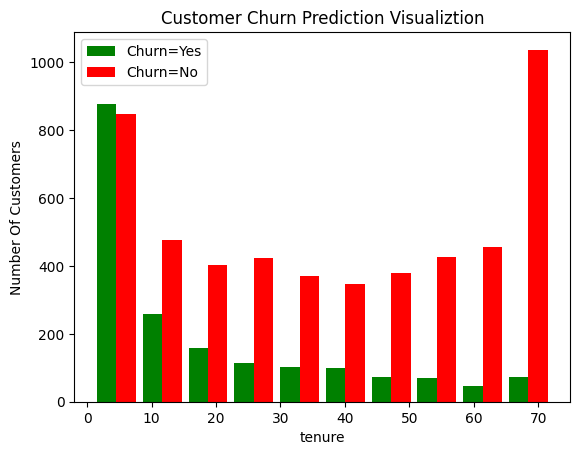

In [57]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.85, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

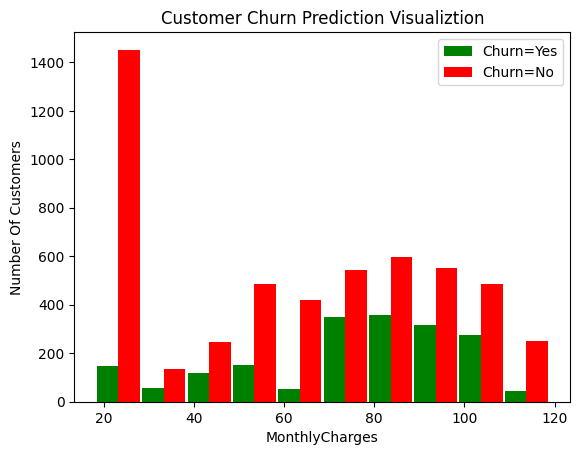

In [65]:
mc_churn_no = df[df.Churn == 'No'].MonthlyCharges   
mc_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges   

plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [71]:
for c in df.columns:
    print(c + ": " + str(df[c].unique()))

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.84 56.94 53.84 ... 63.1  44.2  78.7 ]
TotalCharges:

In [74]:
df.replace({'No phone service':'No', 'No internet service':'No'}, inplace = True)
for c in df.columns:
    print(c + ": " + str(df[c].unique()))

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.84 56.94 53.84 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.84 1890.    108.1  ... 1419.   1990.    306.5 ]
Churn: ['No' 'Yes']


In [78]:
col_yes_no = []
for c in df.columns:
    if df[c].unique()[1] == 'No' or df[c].unique()[1] == 'Yes':
        col_yes_no.append(c)

for c in col_yes_no:
    df[c].replace({'Yes': 1,'No': 0}, inplace=True)

df['gender'].replace({'Female':1, 'Male':0}, inplace = True)

for c in df.columns:
    print(c + ": " + str(df[c].unique()))

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.84 56.94 53.84 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.84 1890.    108.1  ... 1419.   1990.    306.5 ]
Churn: [0 1]


In [80]:
df = pd.get_dummies(data = df, columns = ['InternetService','Contract','PaymentMethod'])
print(df.columns)
print(df.shape)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
(7032, 27)


In [81]:
for c in df.columns:
    print(c + ": " + str(df[c].unique()))

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.84 56.94 53.84 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.84 1890.    108.1  ... 1419.   1990.    306.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [82]:
print(df.dtypes)

gender                                       int64
SeniorCitizen                                 int8
Partner                                      int64
Dependents                                   int64
tenure                                        int8
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float16
TotalCharges                               float16
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [84]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

for c in df.columns:
    print(c + ": " + str(df[c].unique()))

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.       0.4646   0.014084 0.6196   0.0986   0.2957   0.1268   0.3801
 0.859    0.1691   0.2113   0.8027   0.676    0.338    0.9575   0.7183
 0.986    0.2815   0.1549   0.4084   0.648    0.9995   0.2253   0.3662
 0.05634  0.634    0.1409   0.9717   0.873    0.5913   0.1973   0.831
 0.2394   0.9155   0.1126   0.02815  0.4224   0.69     0.887    0.7744
 0.0845   0.577    0.4788   0.6616   0.3943   0.9014   0.521    0.9434
 0.4365   0.7603   0.507    0.4927   0.5635   0.0704   0.04224  0.4507
 0.9297   0.3098   0.7886   0.8447   0.1831   0.2676   0.7324   0.5493
 0.817    0.3237   0.6055   0.2534   0.7466   0.704    0.352    0.535   ]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [0.11536 0.3848  0.354   ... 0.4463  0.2583  0.601  ]
TotalCharges: [0.0012

In [88]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [99]:
%%time
model = keras.Sequential([
    keras.layers.Dense(26, input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5198 - accuracy: 0.7308
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.7934
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4225 - accuracy: 0.7980
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8027
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8028
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8052
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8052
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8098
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8080
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4061 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8304
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8315
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8299
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8308
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8324
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3576 - accuracy: 0.8302
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8293
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8338
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8320
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 

In [100]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7775


[0.4821239113807678, 0.7775408625602722]